In [1]:
# luctivud

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

In [5]:
income_df = pd.read_csv('modified-adult-data.csv')
income_df.head(3)

,Unnamed: 0,age,workclass,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num
0,0,25,Private,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,0,7
1,1,38,Private,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,0,9
2,2,28,Local-gov,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,1,12


## Examine DataSet and categorize variables.

In [6]:
income_df.describe()

,Unnamed: 0,age,capital-gain,capital-loss,hours-per-week,income,education-num
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,24433.151563,38.547941,1101.430344,88.595418,40.938017,0.247844,10.118460
std,14092.966862,13.217870,7506.430084,404.956092,12.007508,0.431766,2.552881
min,0.000000,17.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,12206.250000,28.000000,0.000000,0.000000,40.000000,0.000000,9.000000
50%,24470.000000,37.000000,0.000000,0.000000,40.000000,0.000000,10.000000
75%,36629.750000,47.000000,0.000000,0.000000,45.000000,0.000000,13.000000
max,48841.000000,90.000000,99999.000000,4356.000000,99.000000,1.000000,16.000000


In [9]:
income_df.shape

(45222, 13)

In [11]:
income_df.nunique()

Unnamed: 0        45222
age                  74
workclass             7
marital-status        7
occupation           14
race                  5
gender                2
capital-gain        121
capital-loss         97
hours-per-week       96
native-country       41
income                2
education-num        16
dtype: int64

## Listing of attributes:

1. Age: Quantitative, Continuous

In [24]:
print(income_df['age'].min(), income_df['age'].max())

17 90


2. WorkClass: Categorical, Discrete

In [13]:
income_df['workclass'].unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

3. Martital Status: Categorical, Discrte

In [25]:
income_df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

4. Occupation: Categorical


In [26]:
income_df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

5. Race: Categorical

In [27]:
income_df['race'].unique()

array(['Black', 'White', 'Other', 'Amer-Indian-Eskimo',
       'Asian-Pac-Islander'], dtype=object)

6. Gender: Dicrete [M, F]

7 & 8. Capital Gain and Capital Loss: Continuous

In [28]:
income_df['capital-gain'].min(), income_df['capital-gain'].max()

(0, 99999)

In [29]:
income_df['capital-loss'].min(), income_df['capital-loss'].max()

(0, 4356)

9. Hours per Week: Quantitative Continuous

In [30]:
income_df['hours-per-week'].min(), income_df['hours-per-week'].max()

(1, 99)

10. Native Country : Categorical

In [31]:
income_df['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

11. Income: Prediction [0, 1]

12. Educational Number: Continuous

In [32]:
income_df['education-num'].min(), income_df['education-num'].max()

(1, 16)

## Handle categorical variables with numerically coded values

Income Prediction has already been numerically coded as :-


0:  Less than 50k

1:  Greater than 50k

Gender will be coded as:

0: Female 

1: Male

In [35]:
income_df['gender_numeric'] = np.where(income_df['gender'] == 'Male', 1, np.where(income_df['gender'] == 'Female', 0, income_df['gender']))
income_df.head(5)

,Unnamed: 0,age,workclass,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num,gender_numeric
0,0,25,Private,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,0,7,1
1,1,38,Private,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,0,9,1
2,2,28,Local-gov,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,1,12,1
3,3,44,Private,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,1,10,1
4,5,34,Private,Never-married,Other-service,White,Male,0,0,30,United-States,0,6,1


In [36]:
income_df.tail(5)

,Unnamed: 0,age,workclass,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num,gender_numeric
45217,48837,27,Private,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,0,12,0
45218,48838,40,Private,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,United-States,1,9,1
45219,48839,58,Private,Widowed,Adm-clerical,White,Female,0,0,40,United-States,0,9,0
45220,48840,22,Private,Never-married,Adm-clerical,White,Male,0,0,20,United-States,0,9,1
45221,48841,52,Self-emp-inc,Married-civ-spouse,Exec-managerial,White,Female,15024,0,40,United-States,1,9,0


In [37]:
del income_df['gender']

In [38]:
income_df.head(2)

,Unnamed: 0,age,workclass,marital-status,occupation,race,capital-gain,capital-loss,hours-per-week,native-country,income,education-num,gender_numeric
0,0,25,Private,Never-married,Machine-op-inspct,Black,0,0,40,United-States,0,7,1
1,1,38,Private,Married-civ-spouse,Farming-fishing,White,0,0,50,United-States,0,9,1


In [42]:
income_df['marital-status'].replace(['Married-civ-spouse'], 'Married', inplace=True)
income_df['marital-status'].replace('Never-married', 'Not-married', inplace=True)
income_df['marital-status'].replace(['Divorced'], 'Separated', inplace=True)
income_df['marital-status'].replace(['Widowed'], 'Separated', inplace=True)
income_df['marital-status'].replace(['Separated'], 'Separated', inplace=True)
income_df['marital-status'].replace(['Married-spouse-absent'], 'Not-married', inplace=True)
income_df['marital-status'].replace(['Married-AF-spouse'], 'Married', inplace=True)
income_df['marital-status'].unique()

array(['Not-married', 'Married', 'Separated'], dtype=object)

In [44]:
income_df.workclass = income_df.workclass.replace({'Self-emp-not-inc': 'Self-emp',
                                        'Self-emp-inc': 'Self-emp',
                                        'Local-gov': 'Gov',
                                        'Federal-gov': 'Gov',
                                        'State-gov': 'Gov'})
income_df.workclass.unique()

array(['Private', 'Gov', 'Self-emp', 'Without-pay'], dtype=object)

In [56]:
income_df.drop(df.columns[0], axis=1, inplace=True)


In [57]:
income_df.head()

,age,workclass,marital-status,occupation,race,capital-gain,capital-loss,hours-per-week,native-country,income,education-num,gender_numeric
0,25,Private,Not-married,Machine-op-inspct,Black,0,0,40,United-States,0,7,1
1,38,Private,Married,Farming-fishing,White,0,0,50,United-States,0,9,1
2,28,Gov,Married,Protective-serv,White,0,0,40,United-States,1,12,1
3,44,Private,Married,Machine-op-inspct,Black,7688,0,40,United-States,1,10,1
4,34,Private,Not-married,Other-service,White,0,0,30,United-States,0,6,1


In [58]:
checkpoint_1 = income_df.copy()

## Perform univariate and bivariate analysis and derive meaningful insights about the dataset

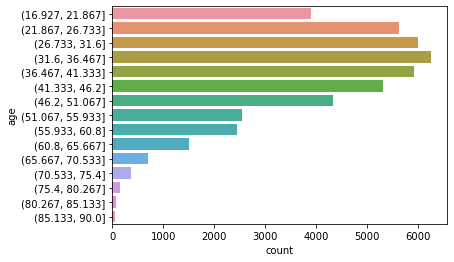

In [67]:
temp_df = pd.DataFrame()
temp_df['age'] = pd.cut(income_df['age'], 15)
sns.countplot(y = 'age', data=temp_df)

#### It is depicted from the above analysis that the majority of people in the dataset belong to age group 20years to 40years.



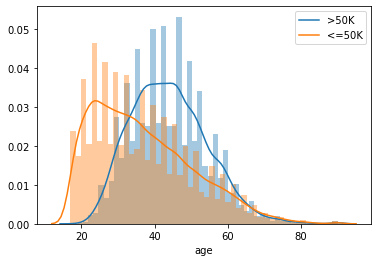

In [69]:
sns.distplot(income_df[income_df['income'] == 1]['age'], kde_kws={"label": ">50K"})
sns.distplot(income_df[income_df['income'] == 0]['age'], kde_kws={"label": "<=50K"})

#### It is shown from the above analysis that while majority of the earning class is in 20-40 years of age, the person who have income greater than 50k belong to 40+ age in ma jority

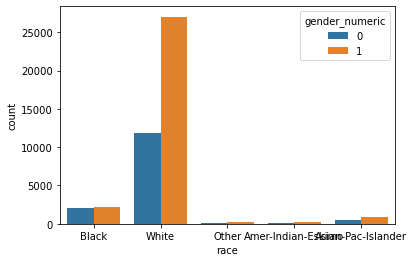

In [81]:
x, y, hue = "race", "count", "gender_numeric"

sns.countplot(x=x, hue=hue, data=income_df)



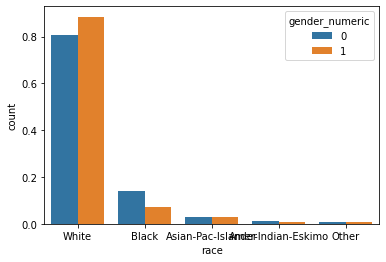

In [82]:
prop_df = (income_df[x]
           .groupby(income_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)

plt.show()

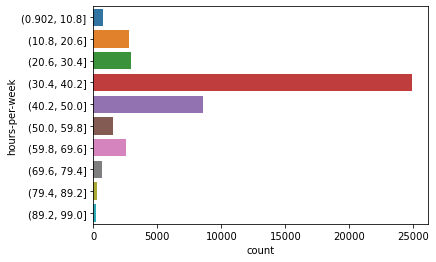

In [84]:
temp_df['hours-per-week'] = pd.cut(income_df['hours-per-week'], 10)
# suitable cut will be 10 because range is 0 to 100.

sns.countplot(y="hours-per-week", data=temp_df)

#### The above analysis shows that majority of the working class dedicates arounf 30 to 40 hours per week to their work, which can be roughly estimated to be around 8 hrs a day for 5 working days.

(20.0, 60.0)

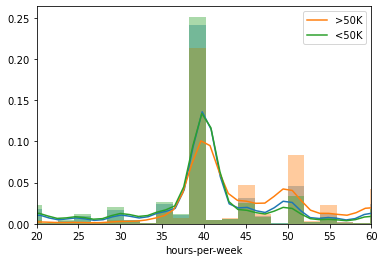

In [88]:
sns.distplot(income_df['hours-per-week']);
sns.distplot(income_df[income_df['income'] == 1]['hours-per-week'], kde_kws={"label": ">50K"})
sns.distplot(income_df[income_df['income'] == 0]['hours-per-week'], kde_kws={"label": "<50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

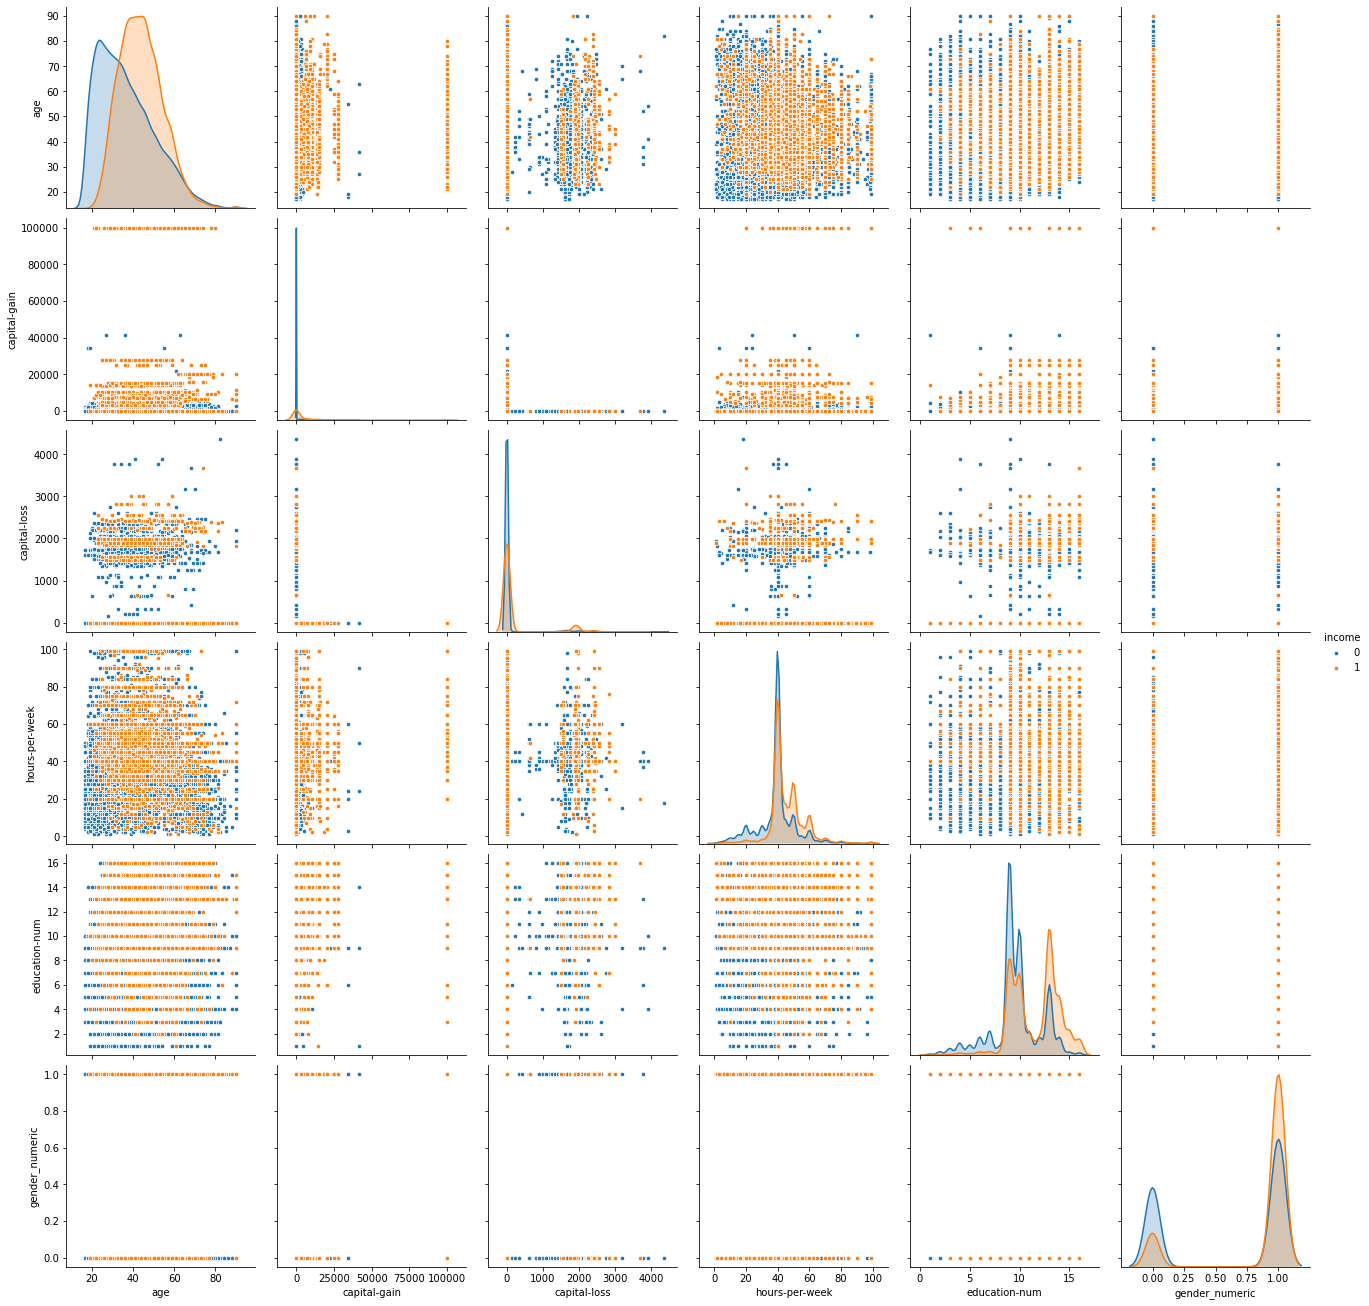

In [93]:
# PAirplot of entire dataset

sns.pairplot(income_df, hue = 'income', height=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )


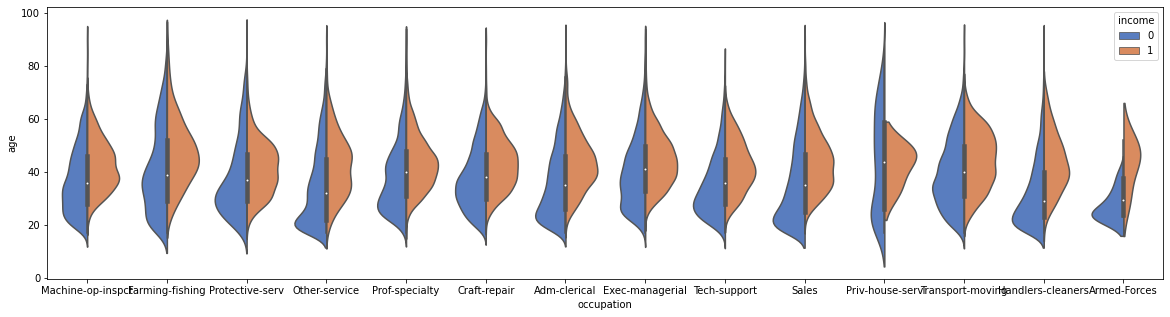

In [96]:
a4_dims = (20, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x="occupation", y="age", hue="income",
                    data=income_df, gridsize=100, palette="muted", split=True)

##### The general trend is that more senior workers have higher salaries. Armed-forces don't have a high job salaries.

##### It is also evident that the private housing have most age variation but the income range for the variation is still nominal means there is not much income in it.

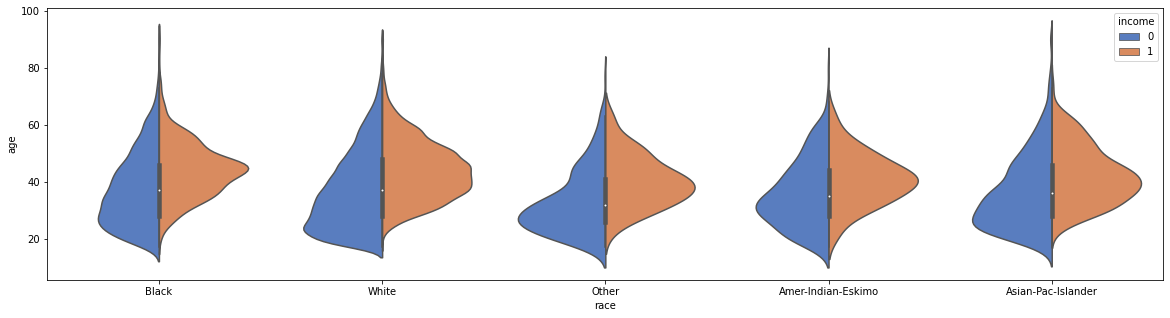

In [98]:
a4_dims = (20, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x="race", y="age", hue="income",
                    data=income_df, gridsize=100, palette="muted", split=True, saturation=0.75)

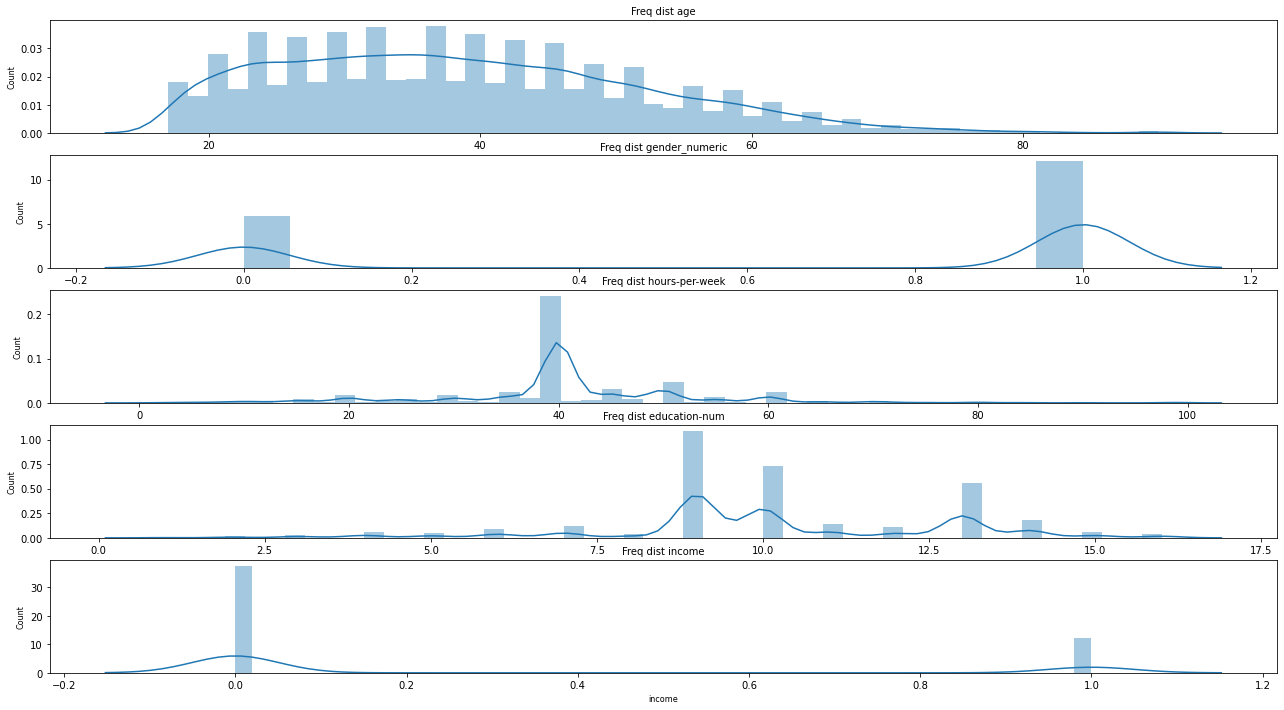

In [105]:
col_names = ['age', 'gender_numeric', 'hours-per-week', 'education-num', 'income']

fig, ax = plt.subplots(len(col_names), figsize=(22,12))

for i, col_val in enumerate(col_names):

    sns.distplot(income_df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

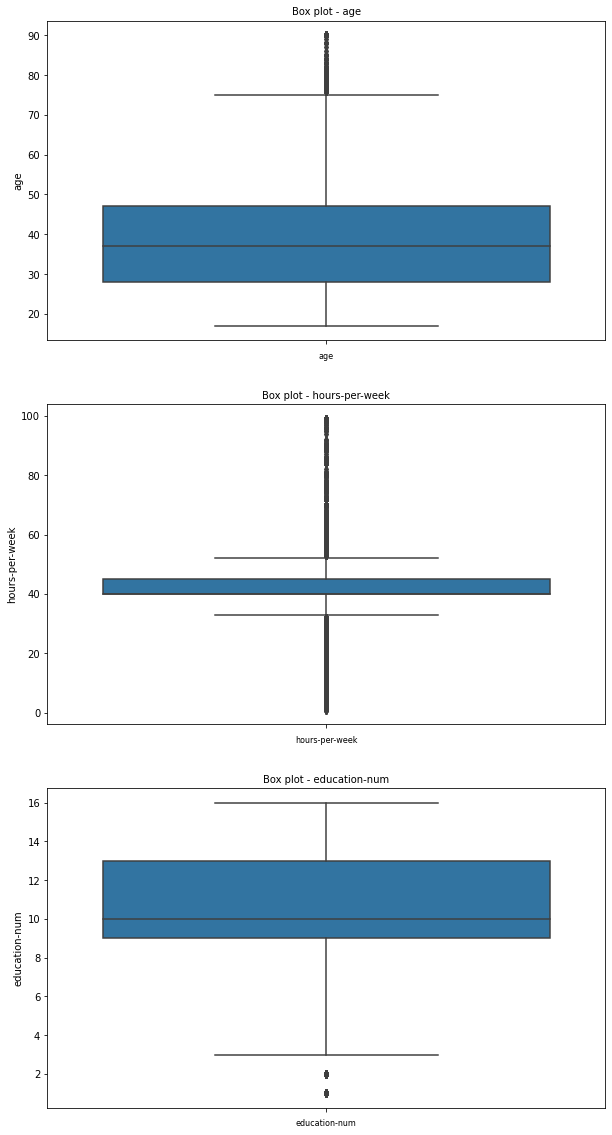

In [112]:
col_names = ['age', 'hours-per-week', 'education-num']

fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=income_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

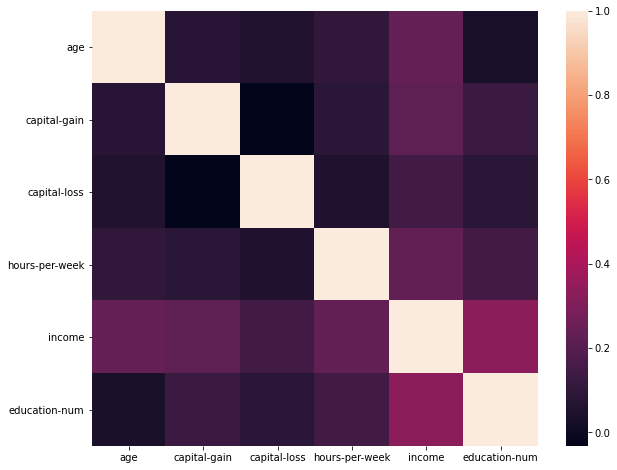

In [113]:
_, ax = plt.subplots(figsize=(10, 8))
corr = income_df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)